In [2]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [55]:
df= pd.read_excel("D:/Dai Hoc/Sau Đại Học/Thi Data Science Talent Competition (DSTC 2024)/Vòng 2/data_clean.xlsx")
df

customer_id  SHORT_TERM_COUNT  MID_TERM_COUNT  LONG_TERM_COUNT  \
0             1639               5.0             2.0              2.0   
1            23717              11.0             2.0              NaN   
2            19474              11.0             2.0              2.0   
3            15505              11.0             2.0              2.0   
4             1538               5.0             5.0              2.0   
...            ...               ...             ...              ...   
19995        13215               5.0             2.0              2.0   
19996          938               5.0             2.0              2.0   
19997        11823               8.0             5.0              2.0   
19998        14609               5.0             2.0              2.0   
19999        18772               8.0             2.0              2.0   

       SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  LONG_TERM_COUNT_BANK  \
0                        1.0                  1.0                   1.0   
1                        7.0                  1.0                   1.0   
2                        4.0                  1.0                   1.0   
3                        1.0                  1.0                   1.0   
4                        1.0                  1.0                   1.0   
...                      ...                  ...                   ...   
19995                    1.0                  1.0                   1.0   
19996                    1.0                  1.0                   1.0   
19997                    7.0                  1.0                   1.0   
19998                    1.0                  1.0                   1.0   
19999                    1.0                  1.0                   1.0   

       SHORT_TERM_COUNT_NON_BANK  MID_TERM_COUNT_NON_BANK  \
0                            4.0                      1.0   
1                            4.0                      1.0   
2                            7.0                      1.0   
3                           10.0                      1.0   
4                            4.0                      4.0   
...                          ...                      ...   
19995                        4.0                      1.0   
19996                        4.0                      1.0   
19997                        1.0                      4.0   
19998                        4.0                      1.0   
19999                        7.0                      1.0   

       LONG_TERM_COUNT_NON_BANK  ...  ENQUIRIES_FROM_BANK_3M_6M  \
0                           1.0  ...                        0.0   
1                           NaN  ...                        NaN   
2                           1.0  ...                        0.0   
3                           1.0  ...                       25.0   
4                           1.0  ...                        0.0   
...                         ...  ...                        ...   
19995                       1.0  ...                        0.0   
19996                       1.0  ...                        0.0   
19997                       1.0  ...                       25.0   
19998                       1.0  ...                       10.0   
19999                       1.0  ...                        0.0   

       ENQUIRIES_FROM_BANK_6M_9M  ENQUIRIES_FROM_BANK_9M_12M  \
0                            0.0                         0.0   
1                            NaN                         0.0   
2                            0.0                        10.0   
3                           10.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
19995                        0.0                         0.0   
19996                        0.0                         NaN   
19997                        0.0                         0.0   
19998                        0.0                   

In [6]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Biểu đồ hình tròn: Tỷ lệ khách hàng theo nhóm khả năng trả nợ
fig_pie = px.pie(
    label_counts,
    names='Label',
    values='Count',
    title='Tỷ lệ khách hàng theo nhóm khả năng trả nợ',
    labels={'Label': 'Nhóm khả năng trả nợ'},
    color='Label',
)

# Thêm chú thích rõ ràng về phần trả nợ đúng hạn và quá hạn
fig_pie.update_traces(textinfo='percent+label')  # Hiển thị phần trăm và nhãn

# Căn giữa tiêu đề
fig_pie.update_layout(title_x=0.5)  # Đặt giá trị từ 0

# Hiển thị biểu đồ
fig_pie.show()


In [8]:
grouped_df = df.groupby('label').agg({
    'SHORT_TERM_COUNT': 'sum',
    'MID_TERM_COUNT': 'sum',
    'LONG_TERM_COUNT': 'sum'
}).reset_index()

# Tính tổng số khoản vay
grouped_df['TOTAL_LOANS'] = grouped_df[['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT']].sum(axis=1)

# Tính tỷ lệ mỗi loại khoản vay so với tổng số khoản vay
grouped_df['SHORT_TERM_RATIO'] = grouped_df['SHORT_TERM_COUNT'] / grouped_df['TOTAL_LOANS']
grouped_df['MID_TERM_RATIO'] = grouped_df['MID_TERM_COUNT'] / grouped_df['TOTAL_LOANS']
grouped_df['LONG_TERM_RATIO'] = grouped_df['LONG_TERM_COUNT'] / grouped_df['TOTAL_LOANS']

# Trực quan hóa
fig = px.bar(grouped_df, 
             x='label', 
             y=['SHORT_TERM_RATIO', 'MID_TERM_RATIO', 'LONG_TERM_RATIO'], 
             title='Tỷ lệ các loại khoản vay theo khả năng trả nợ',
             labels={'label': 'Khả năng trả nợ', 'value': 'Tỷ lệ'},
             barmode='group')

# Căn giữa tiêu đề
fig.update_layout(title_x=0.5)

# Hiển thị biểu đồ
fig.show()


In [21]:
# Bước 1: Tạo biểu đồ hộp để thể hiện phân bố số thẻ tín dụng theo nhóm khả năng trả nợ
fig_box = px.box(
    df,
    x='label',  # Nhóm khả năng trả nợ
    y='NUMBER_OF_CREDIT_CARDS',  # Số lượng thẻ tín dụng
    title='Phân bố số thẻ tín dụng theo nhóm khả năng trả nợ',
    labels={'label': 'Nhóm khả năng trả nợ', 'NUMBER_OF_CREDIT_CARDS': 'Số lượng thẻ tín dụng'},
    color='label'  # Màu sắc theo nhóm khả năng trả nợ
)

# Căn giữa tiêu đề
fig_box.update_layout(title_x=0.5)  # Đặt giá trị từ 0

# Hiển thị biểu đồ
fig_box.show()


In [20]:

# Tính tổng số lượng khách hàng cho từng nhóm khả năng trả nợ
label_counts = df.groupby('label').size().reset_index(name='Count')

# Tính tổng số khoản vay cho từng nhóm khả năng trả nợ
loan_counts = df.groupby('label')[['NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK']].sum().reset_index()

# Kết hợp thông tin giữa số lượng khách hàng và số khoản vay
combined_counts = pd.merge(label_counts, loan_counts, on='label')

# Tạo biểu đồ cột cho số lượng khoản vay
fig = px.bar(
    combined_counts,
    x='label',
    y=['NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK'],
    title='Sự liên quan giữa số lượng khoản vay và khả năng trả nợ',
    labels={'label': 'Khả năng trả nợ', 'value': 'Số lượng khoản vay'},
    barmode='group'
)

# Căn giữa tiêu đề
fig.update_layout(title_x=0.5)

# Hiển thị biểu đồ
fig.show()


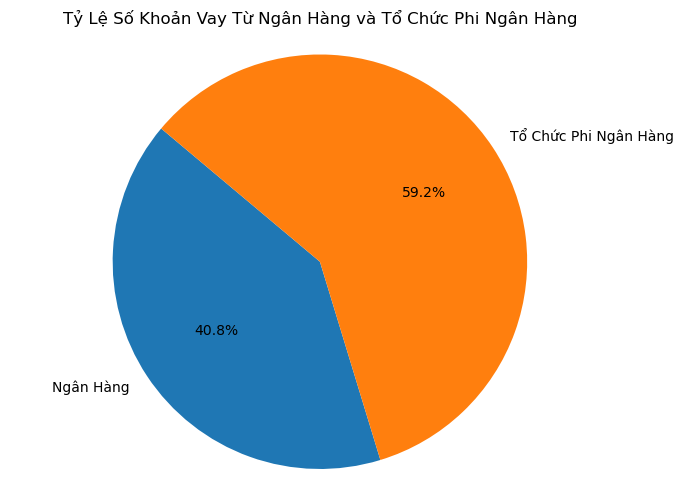

In [37]:

# Biểu đồ tròn - Tỷ lệ số khoản vay từ ngân hàng và tổ chức phi ngân hàng
loan_sources = [
    df['NUMBER_OF_LOANS_BANK'].sum(),
    df['NUMBER_OF_LOANS_NON_BANK'].sum()
]
labels = ['Ngân Hàng', 'Tổ Chức Phi Ngân Hàng']

plt.figure(figsize=(8, 6))
plt.pie(loan_sources, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Tỷ Lệ Số Khoản Vay Từ Ngân Hàng và Tổ Chức Phi Ngân Hàng')
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()


In [27]:
# Tính tổng số khoản vay từ ngân hàng và phi ngân hàng cho từng nhóm khả năng trả nợ
loan_counts = df.groupby('label')[['NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK']].sum().reset_index()

# Chuyển đổi DataFrame từ dạng rộng sang dạng dài để dễ vẽ biểu đồ
loan_counts_melted = loan_counts.melt(id_vars='label', 
                                       value_vars=['NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK'], 
                                       var_name='Loan_Source', 
                                       value_name='Count')

# Tạo biểu đồ cột
fig = px.bar(
    loan_counts_melted,
    x='label',
    y='Count',
    color='Loan_Source',
    barmode='group',
    title='So sánh số lượng khoản vay từ ngân hàng và phi ngân hàng theo khả năng trả nợ',
    labels={'label': 'Khả năng trả nợ', 'Count': 'Số lượng khoản vay'}
)

# Căn giữa tiêu đề
fig.update_layout(title_x=0.5)

# Hiển thị biểu đồ
fig.show()


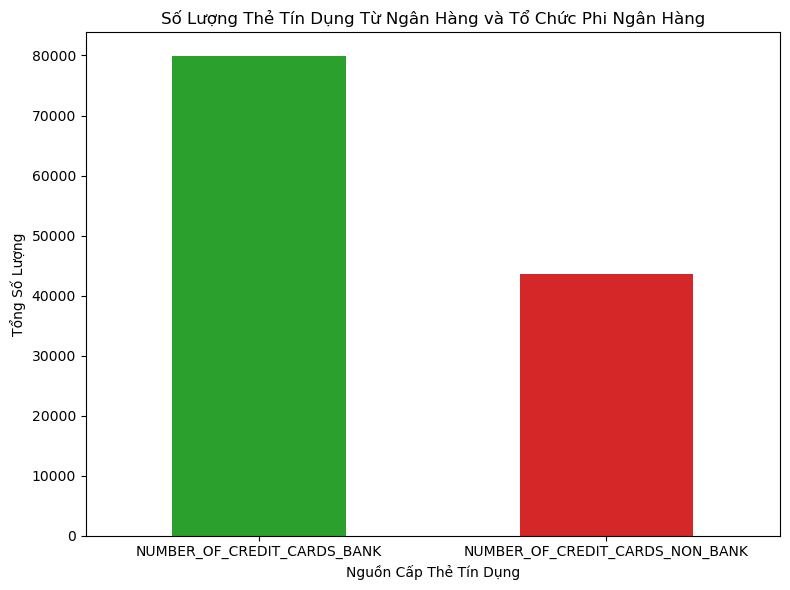

In [29]:
# Biểu đồ cột nhóm - Tổng số thẻ tín dụng từ ngân hàng và tổ chức phi ngân hàng
credit_card_counts = df[['NUMBER_OF_CREDIT_CARDS_BANK', 'NUMBER_OF_CREDIT_CARDS_NON_BANK']].sum()

plt.figure(figsize=(8, 6))
credit_card_counts.plot(kind='bar', color=['#2ca02c', '#d62728'])
plt.title('Số Lượng Thẻ Tín Dụng Từ Ngân Hàng và Tổ Chức Phi Ngân Hàng')
plt.xlabel('Nguồn Cấp Thẻ Tín Dụng')
plt.ylabel('Tổng Số Lượng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


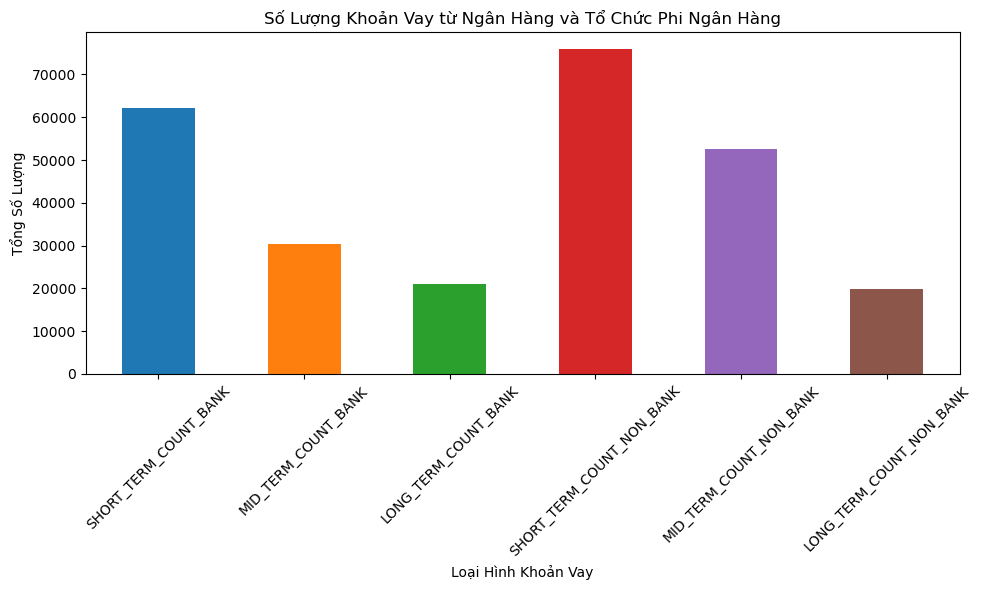

In [28]:
# Biểu đồ cột nhóm - Số lượng khoản vay từ ngân hàng và tổ chức phi ngân hàng
loan_counts = df[['SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK', 'LONG_TERM_COUNT_BANK', 
                  'SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK', 'LONG_TERM_COUNT_NON_BANK']].sum()

plt.figure(figsize=(10, 6))
loan_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Số Lượng Khoản Vay từ Ngân Hàng và Tổ Chức Phi Ngân Hàng')
plt.xlabel('Loại Hình Khoản Vay')
plt.ylabel('Tổng Số Lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
### 4. Biểu đồ phân tán (Scatter Plot) - Mối quan hệ giữa số lượng khoản vay và số thẻ tín dụng
fig_scatter = px.scatter(
    df,
    x='NUMBER_OF_LOANS',
    y='NUMBER_OF_CREDIT_CARDS',
    size='NUMBER_OF_RELATIONSHIP',
    color='label',
    title='Mối quan hệ giữa số lượng khoản vay và số thẻ tín dụng',
    labels={'NUMBER_OF_LOANS': 'Số lượng khoản vay', 'NUMBER_OF_CREDIT_CARDS': 'Số lượng thẻ tín dụng', 'label': 'Nhóm khả năng trả nợ'},
    color_continuous_scale=px.colors.sequential.Viridis,
    hover_data=['customer_id']
)
# Căn giữa tiêu đề
fig_scatter.update_layout(title_x=0.5)

fig_scatter.show()

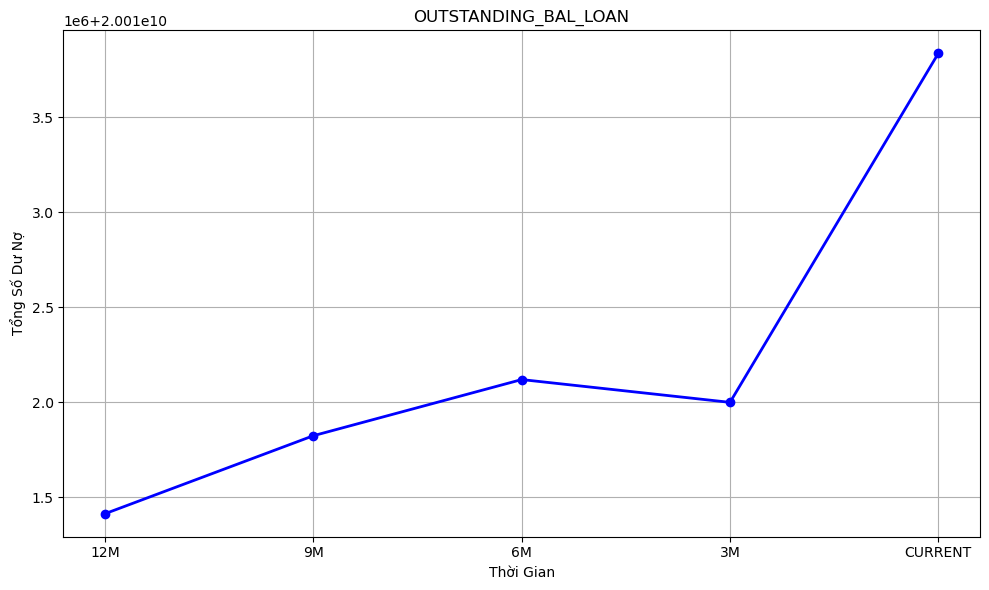

In [58]:
# Biểu đồ đường - Số dư nợ của các khoản vay qua các tháng
months = ['12M', '9M','6M','3M','CURRENT']
outstanding_bal_loan = [
    df['OUTSTANDING_BAL_LOAN_12M'].sum(),
    df['OUTSTANDING_BAL_LOAN_9M'].sum(),
    df['OUTSTANDING_BAL_LOAN_6M'].sum(),
    df['OUTSTANDING_BAL_LOAN_3M'].sum(),
    df['OUTSTANDING_BAL_LOAN_CURRENT'].sum()
]

plt.figure(figsize=(10, 6))
plt.plot(months, outstanding_bal_loan, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('OUTSTANDING_BAL_LOAN')
plt.xlabel('Thời Gian')
plt.ylabel('Tổng Số Dư Nợ')
plt.xticks(months)
plt.grid()
plt.tight_layout()
plt.show()

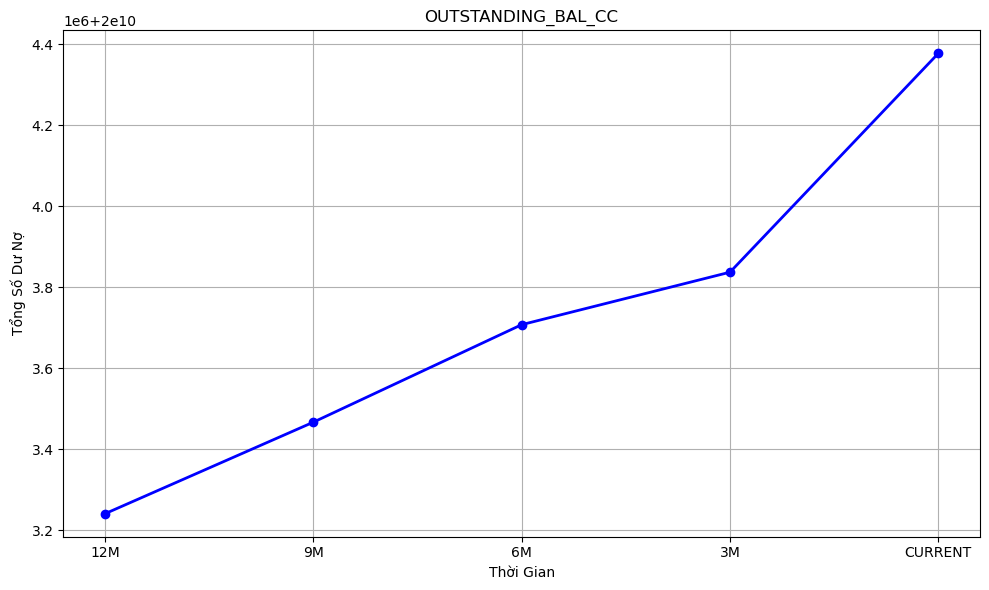

In [59]:
# Biểu đồ đường - Số dư nợ của các khoản vay qua các tháng
months = ['12M', '9M','6M','3M','CURRENT']
outstanding_bal_loan = [
    df['OUTSTANDING_BAL_CC_12M'].sum(),
    df['OUTSTANDING_BAL_CC_9M'].sum(),
    df['OUTSTANDING_BAL_CC_6M'].sum(),
    df['OUTSTANDING_BAL_CC_3M'].sum(),
    df['OUTSTANDING_BAL_CC_CURRENT'].sum()
]
plt.figure(figsize=(10, 6))
plt.plot(months, outstanding_bal_loan, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('OUTSTANDING_BAL_CC')
plt.xlabel('Thời Gian')
plt.ylabel('Tổng Số Dư Nợ')
plt.xticks(months)
plt.grid()
plt.tight_layout()
plt.show()

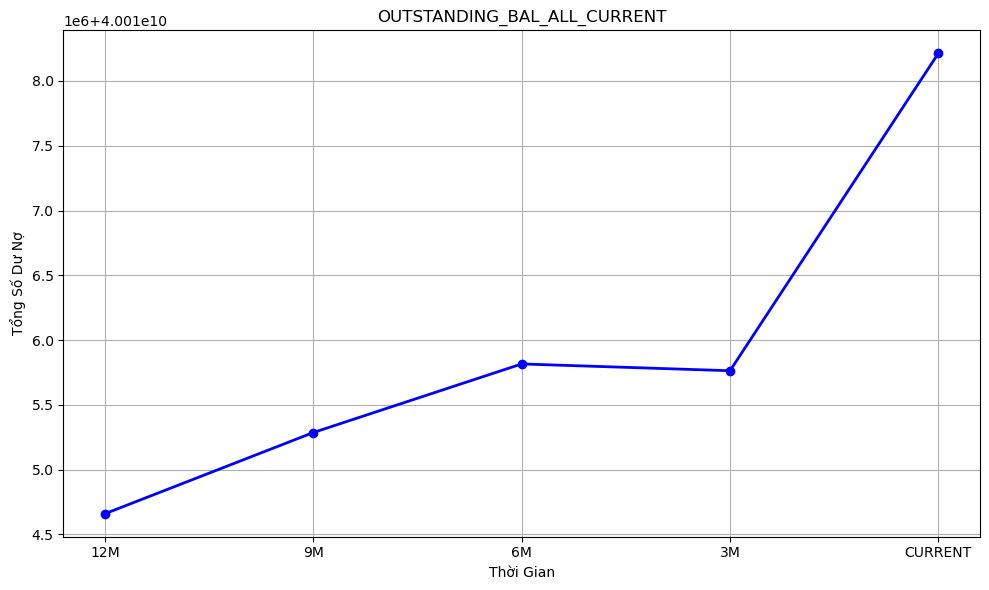

In [60]:
# Biểu đồ đường - Số dư nợ của các khoản vay qua các tháng
months = ['12M', '9M','6M','3M','CURRENT']
outstanding_bal_loan = [
    df['OUTSTANDING_BAL_ALL_12M'].sum(),
    df['OUTSTANDING_BAL_ALL_9M'].sum(),
    df['OUTSTANDING_BAL_ALL_6M'].sum(),
    df['OUTSTANDING_BAL_ALL_3M'].sum(),
    df['OUTSTANDING_BAL_ALL_CURRENT'].sum()
]

plt.figure(figsize=(10, 6))
plt.plot(months, outstanding_bal_loan, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('OUTSTANDING_BAL_ALL_CURRENT')
plt.xlabel('Thời Gian')
plt.ylabel('Tổng Số Dư Nợ')
plt.xticks(months)
plt.grid()
plt.tight_layout()
plt.show()

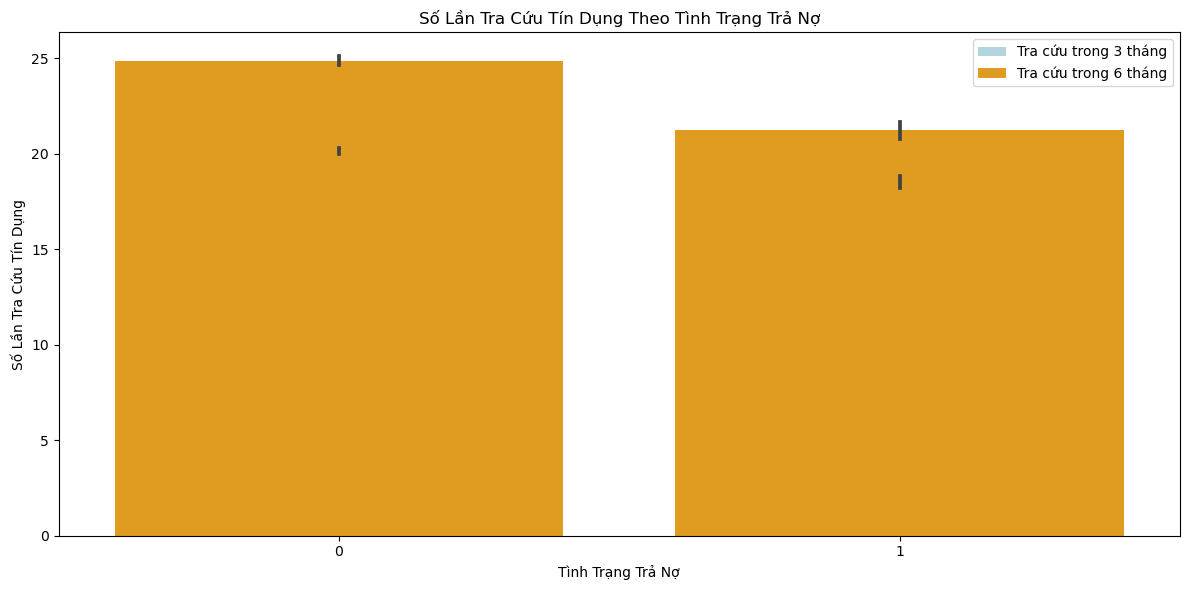

In [48]:
# Biểu đồ cột nhóm - Số lần tra cứu tín dụng theo tình trạng trả nợ
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='label', y='ENQUIRIES_3M', color='lightblue', label='Tra cứu trong 3 tháng')
sns.barplot(data=df, x='label', y='ENQUIRIES_6M', color='orange', label='Tra cứu trong 6 tháng')
plt.title('Số Lần Tra Cứu Tín Dụng Theo Tình Trạng Trả Nợ')
plt.xlabel('Tình Trạng Trả Nợ')
plt.ylabel('Số Lần Tra Cứu Tín Dụng')
plt.legend()
plt.tight_layout()
plt.show()


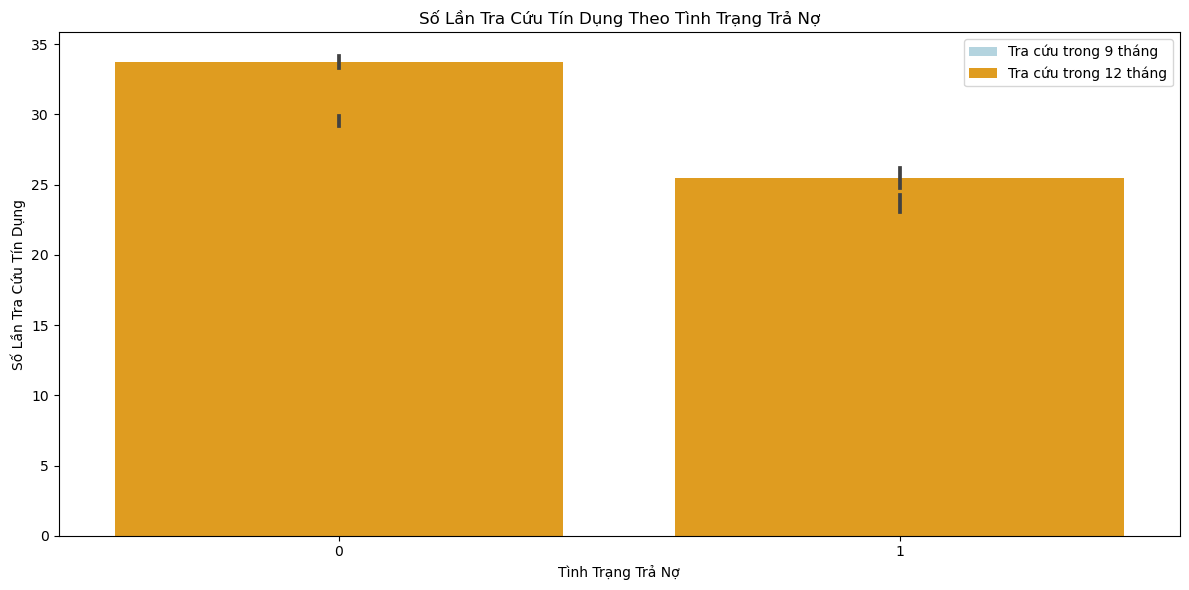

In [61]:
# Biểu đồ cột nhóm - Số lần tra cứu tín dụng theo tình trạng trả nợ
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='label', y='ENQUIRIES_9M', color='lightblue', label='Tra cứu trong 9 tháng')
sns.barplot(data=df, x='label', y='ENQUIRIES_12M', color='orange', label='Tra cứu trong 12 tháng')
plt.title('Số Lần Tra Cứu Tín Dụng Theo Tình Trạng Trả Nợ')
plt.xlabel('Tình Trạng Trả Nợ')
plt.ylabel('Số Lần Tra Cứu Tín Dụng')
plt.legend()
plt.tight_layout()
plt.show()


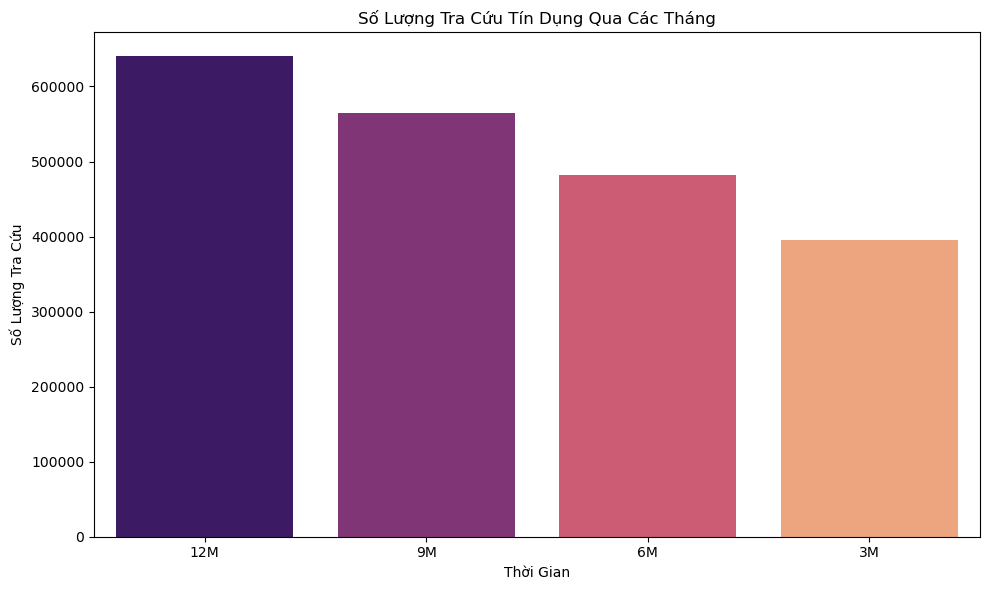

In [57]:
enquiries = [
    df['ENQUIRIES_12M'].sum(),
    df['ENQUIRIES_9M'].sum(),
    df['ENQUIRIES_6M'].sum(),
    df['ENQUIRIES_3M'].sum()
]

# Xác định tên cho trục x
months = ['12M', '9M', '6M', '3M']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=enquiries, palette='magma')
plt.title('Số Lượng Tra Cứu Tín Dụng Qua Các Tháng')
plt.xlabel('Thời Gian')
plt.ylabel('Số Lượng Tra Cứu')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

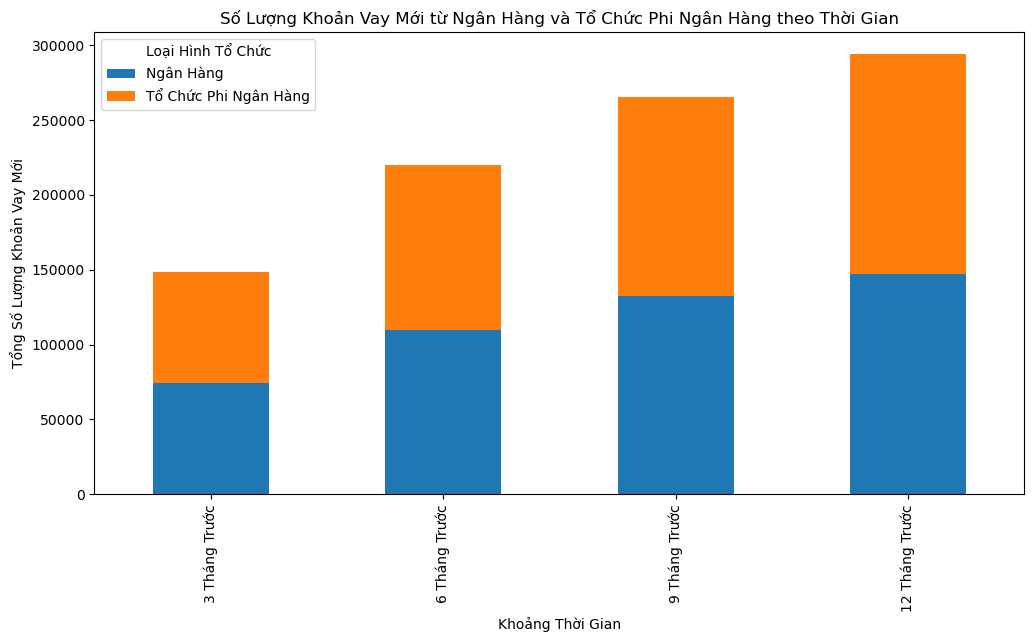

In [27]:

### 4. Biểu đồ cột xếp chồng (Stacked Bar Chart) - Số lượng khoản vay mới từ ngân hàng và tổ chức phi ngân hàng trong các khoảng thời gian
# Tổng hợp các cột liên quan đến số khoản vay mới trong các khoảng thời gian
new_loan_data = df[['NUM_NEW_LOAN_TAKEN_BANK_3M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M',
                    'NUM_NEW_LOAN_TAKEN_BANK_6M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
                    'NUM_NEW_LOAN_TAKEN_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M',
                    'NUM_NEW_LOAN_TAKEN_BANK_12M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M']].sum()

# Tạo DataFrame để biểu diễn dữ liệu theo nhóm (Group by ngân hàng và tổ chức phi ngân hàng theo từng khoảng thời gian)
stacked_data = pd.DataFrame({
    'Ngân Hàng': [new_loan_data['NUM_NEW_LOAN_TAKEN_BANK_3M'],
                  new_loan_data['NUM_NEW_LOAN_TAKEN_BANK_6M'],
                  new_loan_data['NUM_NEW_LOAN_TAKEN_BANK_9M'],
                  new_loan_data['NUM_NEW_LOAN_TAKEN_BANK_12M']],
    'Tổ Chức Phi Ngân Hàng': [new_loan_data['NUM_NEW_LOAN_TAKEN_NON_BANK_3M'],
                              new_loan_data['NUM_NEW_LOAN_TAKEN_NON_BANK_6M'],
                              new_loan_data['NUM_NEW_LOAN_TAKEN_NON_BANK_9M'],
                              new_loan_data['NUM_NEW_LOAN_TAKEN_NON_BANK_12M']]
}, index=['3 Tháng Trước', '6 Tháng Trước', '9 Tháng Trước', '12 Tháng Trước'])

# Vẽ biểu đồ cột xếp chồng
stacked_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(12, 6))
plt.title('Số Lượng Khoản Vay Mới từ Ngân Hàng và Tổ Chức Phi Ngân Hàng theo Thời Gian')
plt.xlabel('Khoảng Thời Gian')
plt.ylabel('Tổng Số Lượng Khoản Vay Mới')
plt.legend(title='Loại Hình Tổ Chức')
plt.show()

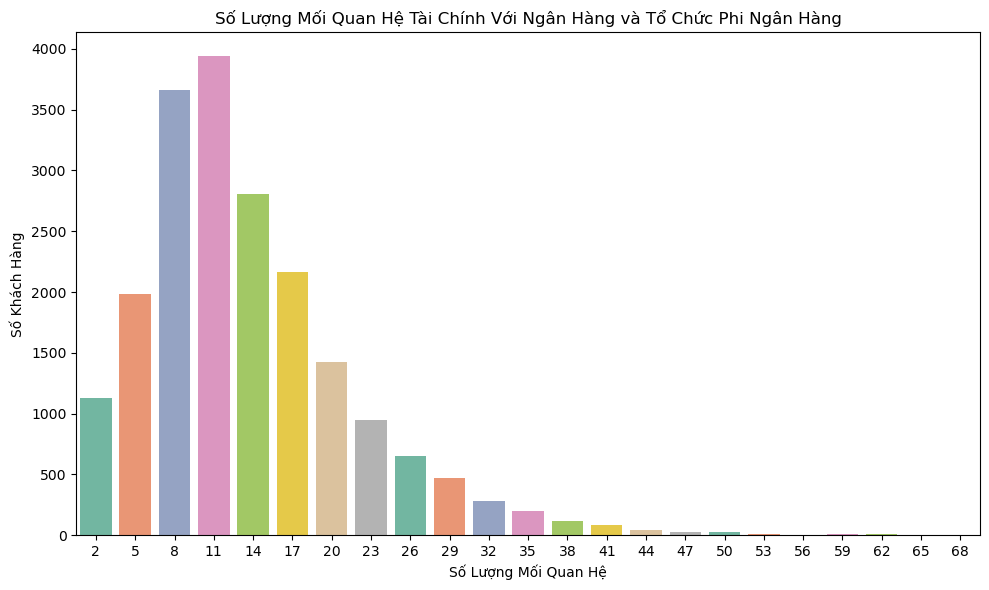

In [37]:

# Biểu đồ cột - Số lượng mối quan hệ tài chính với ngân hàng và tổ chức phi ngân hàng
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NUMBER_OF_RELATIONSHIP', palette='Set2')
plt.title('Số Lượng Mối Quan Hệ Tài Chính Với Ngân Hàng và Tổ Chức Phi Ngân Hàng')
plt.xlabel('Số Lượng Mối Quan Hệ')
plt.ylabel('Số Khách Hàng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



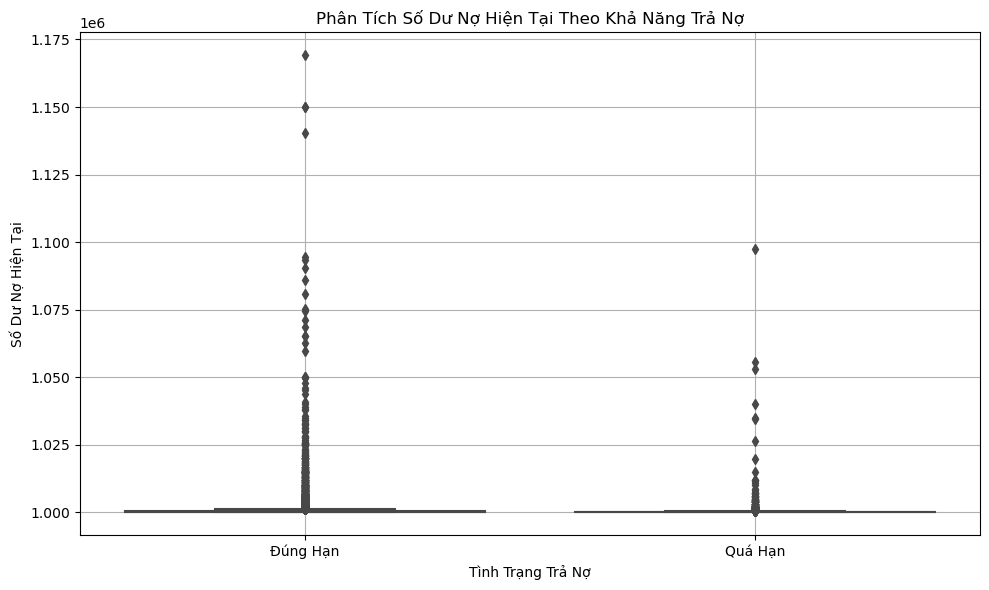

In [47]:
# Biểu đồ boxplot - Phân tích số dư nợ hiện tại theo khả năng trả nợ
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='OUTSTANDING_BAL_LOAN_CURRENT', palette='Set1')
plt.title('Phân Tích Số Dư Nợ Hiện Tại Theo Khả Năng Trả Nợ')
plt.xlabel('Tình Trạng Trả Nợ')
plt.ylabel('Số Dư Nợ Hiện Tại')
plt.xticks(ticks=[0, 1], labels=['Đúng Hạn', 'Quá Hạn'])
plt.grid()
plt.tight_layout()
plt.show()



In [33]:
# 2. Biểu đồ hộp: Số lượng khoản vay theo nhóm khả năng trả nợ
fig_box = px.box(df, x='label', y='NUMBER_OF_LOANS', 
                 title='Số lượng khoản vay theo nhóm khả năng trả nợ',
                 labels={'label': 'Nhóm khả năng trả nợ', 'NUMBER_OF_LOANS': 'Số lượng khoản vay'})
fig_box.show()



In [35]:
# 4. Biểu đồ thanh: Số lượng thẻ tín dụng trung bình theo nhóm khả năng trả nợ
fig_bar = px.bar(df.groupby('label')['NUMBER_OF_CREDIT_CARDS'].mean().reset_index(),
                 x='label', y='NUMBER_OF_CREDIT_CARDS', 
                 title='Số lượng thẻ tín dụng trung bình theo nhóm khả năng trả nợ',
                 labels={'label': 'Nhóm khả năng trả nợ', 'NUMBER_OF_CREDIT_CARDS': 'Số lượng thẻ tín dụng'})
fig_bar.show()

